<a href="https://colab.research.google.com/github/OluwamayowaMusa/AirBnB_clone/blob/master/Using_Classification_algorithms_on_a_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last lesson, we learnt about the `Perceptron model` and how to implement it. This lesson will be about using the `Perceptron model` on a dataset and we will also look at the Object oriented form of the `Perceptron model`.

Let's look at the implementation using Object Oriented approach. ✈

In [2]:
import numpy as np

In [3]:
class Perceptron:
  """ Perceptron classifier

  Parameters:
    eta (float): Learning rate (between 0.0 and 1.0)
    n_iter (int): Passing ovet the training dataset
    random_state (int): Random number generator seed for random weight 
                        initialization

  Attributes:
    w_ (1d-array): Weights after fitting
    errors_ (list): Number of misclassifications (updates) in each epoch

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit traning data

    Parameters:
      X (array): shape = [n_examples, n_features]), Training vectors, where
                 n_examples is the number of examples and n_features is the number 
                 of features
      y (array): shape = [n_example], Target values

    Returns:
      self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)

    return self

  def net_input(self, X):
    """ Calculate net input """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """ Return class label after unit step """
    return np.where(self.net_input(X) >= 0.0, 1, -1)

Woww that is a whole lot. Comparing the Object Oriented Perceptron model to the functional one I prefer the Object Oriented one 🤭.

Let's load our dataset

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
s = os.path.join("https://archive.ics.uci.edu", "ml",
                 "machine-learning-databases", "iris",
                 "iris.data")
print("URL: ", s)

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [6]:
df = pd.read_csv(s, header=None, encoding="utf-8")

In [7]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [9]:
X = df.iloc[0:100, [0, 2]].values

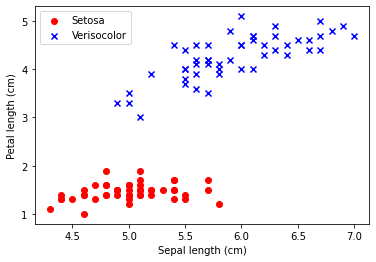

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color="red",
            marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue",
            marker='x', label="Verisocolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend(loc="upper left")
plt.show()

From the plot above, we can see the dataset is linearly separable, let's train our perceptron algorithm

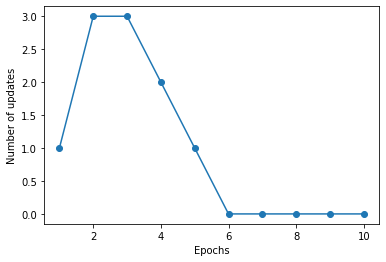

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

We can see that our perceptron converged after the sixth epoch. Let's implement a small convenience to visualize the decision boundaries for two-dimensional datasets:

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl,
                edgecolor='black')

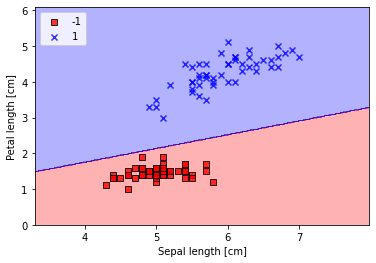

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

## Adaptive Linear Neurons and the convergence of learning

Let's take another look at another type of single layer neural network (NN): `Adaptive Linear Neuron (Adaline)`. `Adaline` is considered an improvement on the `perceptron algorithm` cause it illustrates the key concepts of `defining and minimizing continuous cost functions`. The key difference between the `Adaline` and `Perceptron` is that the weights are updated based on a `linear activation` function.

## Minimizing Cost functions with gradient descent

One of the key ingredients of `Supervised Machine Learning algortihms` is a defined `Objective function (cost or loss function)` to be optimized during the learning process. We often want to `minimize` the `cost function`. 

To learn more about the cost function and minimizing the cost function using gradient descent refer to the `Python Machine Learning Book 📗`.

Let's Implement the Adaline

In [14]:
class AdalineGD:
  """
  ADAptive LInear NEuron classifier

  Parameters:
  eta (float): Learning Rate between (0.0 and 1.0)
  n_iter (int): Passes Over the training Dataset
  random_state (int): Random Number generator seed for random weight
                     initialization

  Attributes:
  w_ (1-d array): Weights after fitting
  cost (list): Sum of squares cost function value in each epoch 
  """

  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit training data

    Parameters:
      X (array-like, shape = [n_examples, n_features]): Training vectors
                where n_examples is the number of examples and n_features
                is the number of features
      y (array-like): Target Values

    Returns:
      self, object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                          size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """ Calculate the net input """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """ Computes linear activation """
    return X
  
  def predict(self, X):
    """ Return Class label after unit step """
    return np.where(self.activation(self.net_input(X) >= 0.0),
                    1, -1)

Let's Observe how Adaline behaves for two different Learning rate

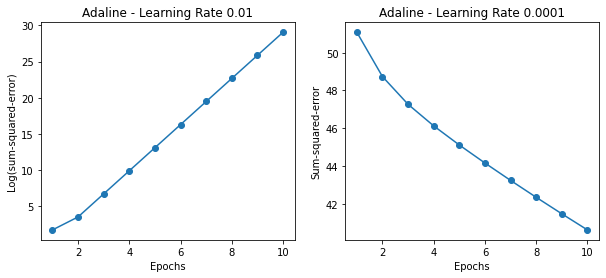

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Log(sum-squared-error)")
ax[0].set_title("Adaline - Learning Rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline - Learning Rate 0.0001");

As we can see a high learning rate causes us to over shoot the global minimum.

To avoid this, we can make use of a feature scaling techique called `Standardization`, which gives or data properties of a `Standard Normal Distribution`: `zero mean` and `unit variance`. To know more about this technique and why it is useful, refer to Python Machine Learning Text.

Let's peform standardization using numpy

In [16]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

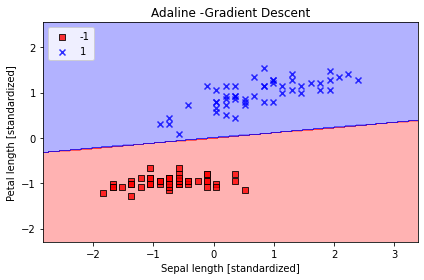

In [17]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline -Gradient Descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()

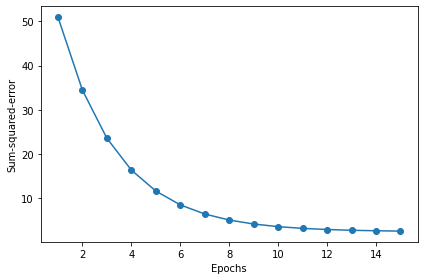

In [18]:
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_,
         marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()

## Large-scale machine learning and stochastic gradient descent

`Stochastic gradient descent` involves updating the weight incrementally for `each` training example compared to `Batch Gradient Descent` which updates the weights based on the sum of the accumualted errors over `all` training examples. To learn about the advantages of `SGD` over `BGD`, refer to the Python Machine Learning text.

Let's Implement the `SGD`

In [19]:
class AdalineSGD:
  """
  ADAptive LInear NEuron classifier Based on Stochastic Gradient Descent

  Parameters:
    eta (float): Learning rate (between 0.0 and 1.0)
    n_iter (int): Number of iterations
    shuffle (bool): Shuffles training data every epoch to prevent cycle
                    (Default: True)
    random_state (int): Random Number Generator seed for random weight
                        Initialization
                  
  Attributes:
    w_ (1-D array): Weights after fitting
    cost_ (list): Sum of squares cost function value averaged over all
                  training examples in each epoch
  """
  def __init__(self, eta=0.01, n_iter=10,
               shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """
    Fit training data

    Parameters:
      X (array-like): shape - [n_examples, n_features]
                      Training Vectors where n_examples is the 
                      number of examples and n_features is the 
                      number of features
      y (array-like): shape - [n_examples]
                      Target Values

    Returns:
      self: Object  
    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self

  def partial_fit(self, X, y):
    """ Fit training data without reintializing the weights """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)

  def _initialize_weights(self, m):
    """ Initialize weights to small numbers """
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                             size=1 + m)
    self.w_initialized = True
  
  def _shuffle(self, X, y):
    """ Shuffle Training Data """
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _update_weights(self, xi, target):
    """ Apply Adaline learning rule to update the weghts"""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error ** 2
    return cost

  def net_input(self, X):
    """ Calculate the net input """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """ Compute linear activation """
    return X

  def predict(self, X):
    """ Return the class label after unit step """
    return np.where(self.activation(self.net_input(X))
                    >= 0.0, 1, -1)

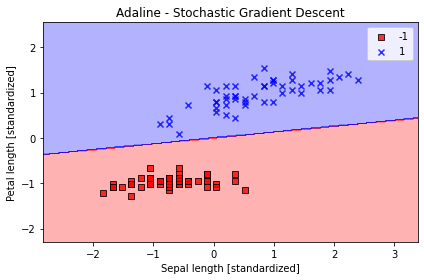

In [22]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper right")
plt.tight_layout();

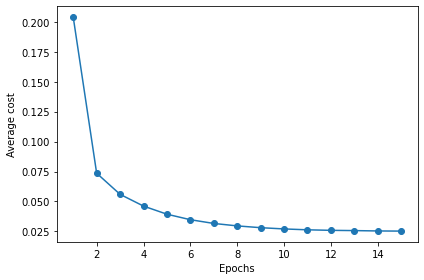

In [21]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_,
         marker='o')
plt.xlabel("Epochs")
plt.ylabel("Average cost")
plt.tight_layout()